In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [28]:
df = pd.read_csv('/Users/moiz/Desktop/IntrotoAI/cleaned_data.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


              precision    recall  f1-score   support

          No       0.96      0.99      0.97     46573
         Yes       0.55      0.25      0.34      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205



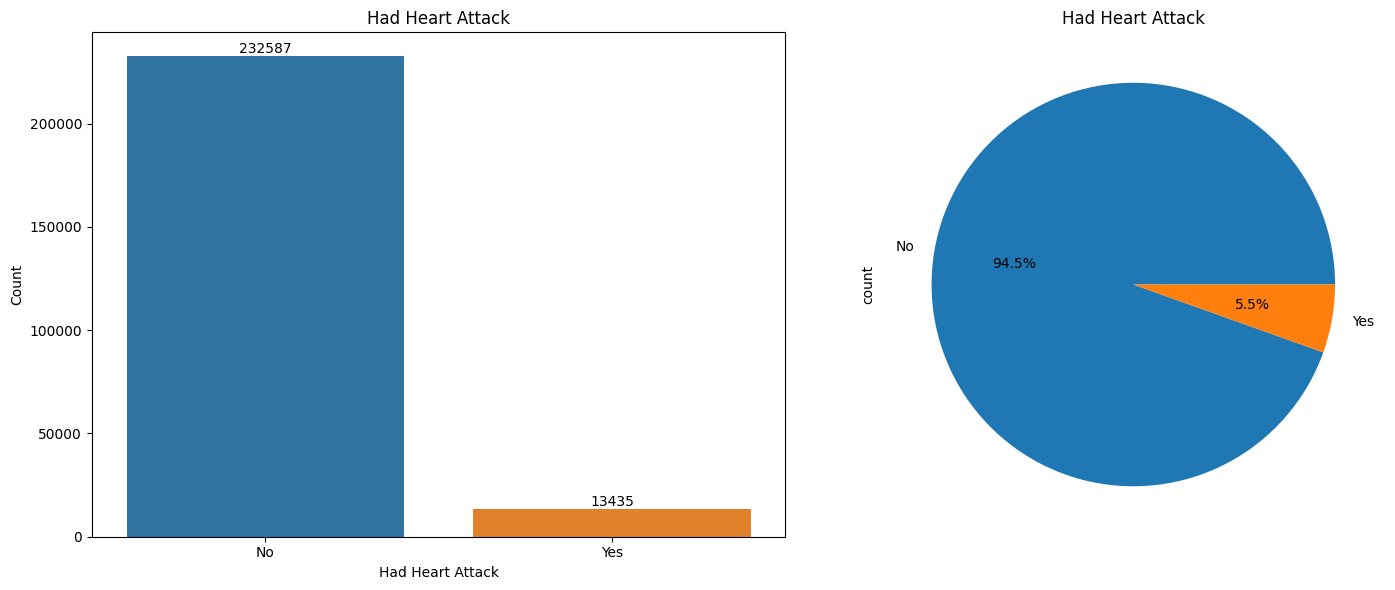

Accuracy: 0.95


In [32]:


# Load the data
df = pd.read_csv('/Users/moiz/Desktop/IntrotoAI/cleaned_data.csv')

# Assuming 'HadHeartAttack' is your target variable
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='saga', random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Create visualizations
plt.figure(figsize=(15, 6))

# Bar plot
plt.subplot(1, 2, 1)
sns.countplot(x='HadHeartAttack', data=df)
plt.title('Had Heart Attack')
plt.xlabel('Had Heart Attack')
plt.ylabel('Count')

# Add count labels on top of bars
for i, v in enumerate(df['HadHeartAttack'].value_counts()):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Pie chart
plt.subplot(1, 2, 2)
df['HadHeartAttack'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Had Heart Attack')

plt.tight_layout()
plt.show()

# Print accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")



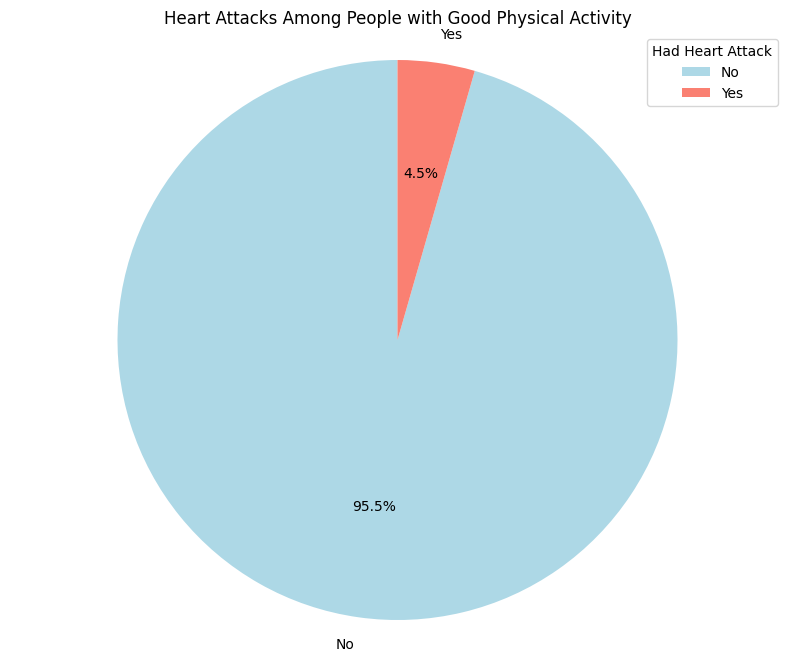

HadHeartAttack
No     182804
Yes      8514
Name: count, dtype: int64


In [33]:
good_physical_activity = df[df['PhysicalActivities'] == 'Yes']

# Count heart attacks among those with good physical activity
heart_attack_counts = good_physical_activity['HadHeartAttack'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(heart_attack_counts.values, labels=heart_attack_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Heart Attacks Among People with Good Physical Activity')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a legend
plt.legend(title="Had Heart Attack", loc="best")

plt.show()

# Print the counts
print(heart_attack_counts)

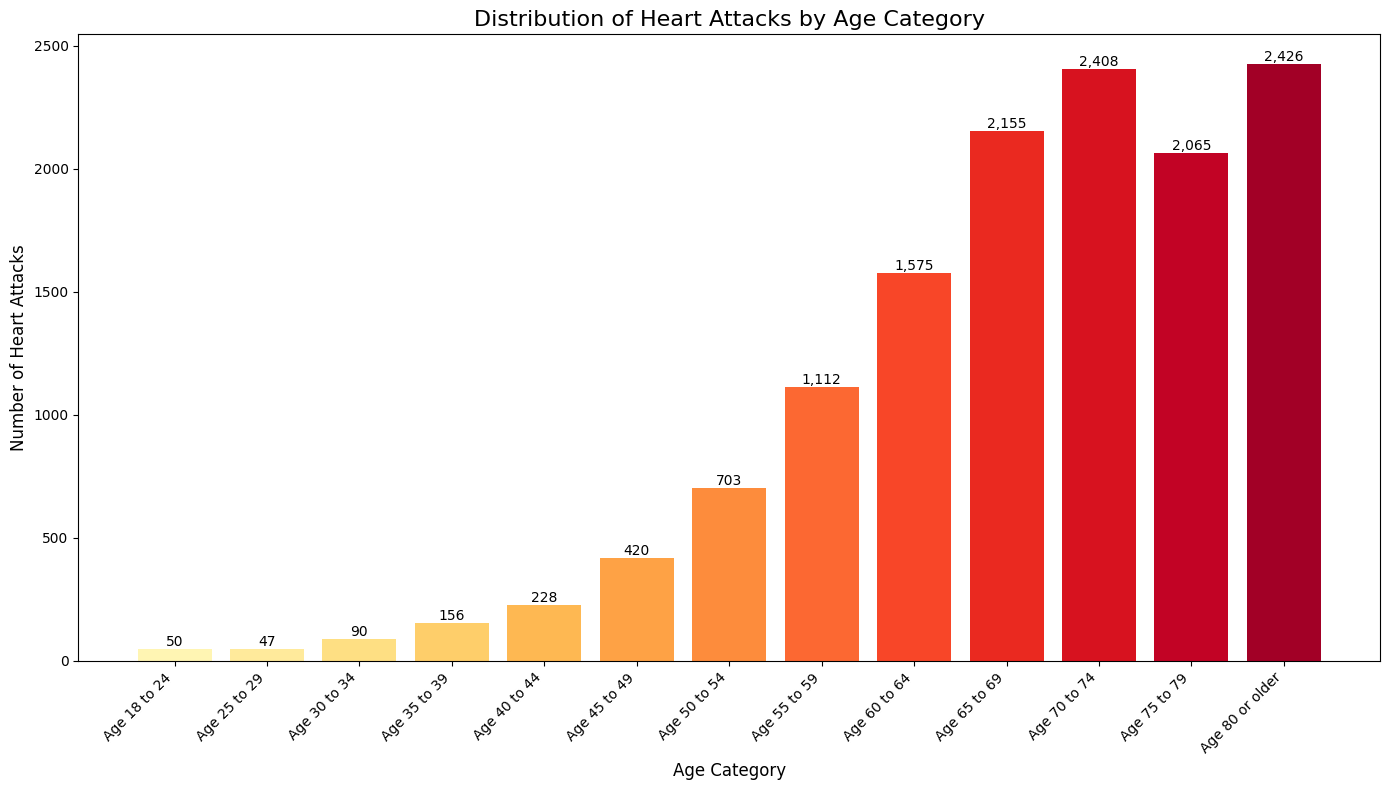

AgeCategory
Age 18 to 24         50
Age 25 to 29         47
Age 30 to 34         90
Age 35 to 39        156
Age 40 to 44        228
Age 45 to 49        420
Age 50 to 54        703
Age 55 to 59       1112
Age 60 to 64       1575
Age 65 to 69       2155
Age 70 to 74       2408
Age 75 to 79       2065
Age 80 or older    2426
Name: count, dtype: int64


In [42]:
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by age category
heart_attacks_by_age = heart_attacks['AgeCategory'].value_counts().sort_index()

# Create a color palette
colors = sns.color_palette("YlOrRd", n_colors=len(heart_attacks_by_age))

# Create the bar graph
plt.figure(figsize=(14, 8))
bars = plt.bar(heart_attacks_by_age.index, heart_attacks_by_age.values, color=colors)

# Add labels and title
plt.title('Distribution of Heart Attacks by Age Category', fontsize=16)
plt.xlabel('Age Category', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_age)

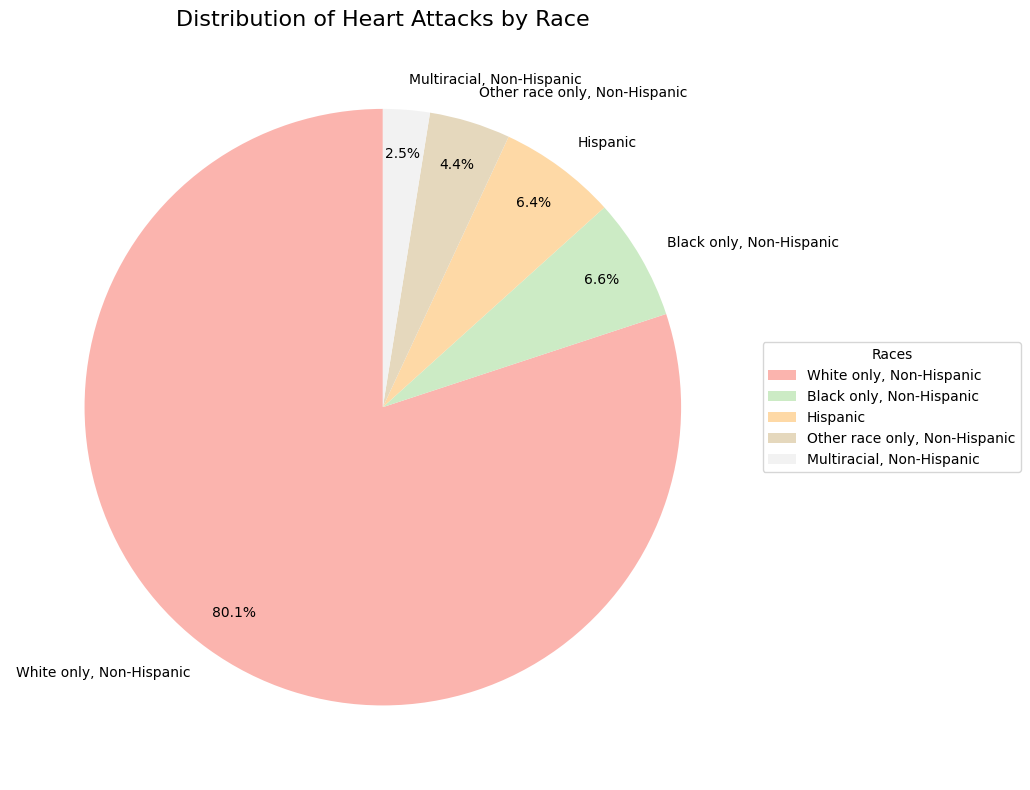

RaceEthnicityCategory
White only, Non-Hispanic         10756
Black only, Non-Hispanic           889
Hispanic                           859
Other race only, Non-Hispanic      591
Multiracial, Non-Hispanic          340
Name: count, dtype: int64


In [44]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by race
heart_attacks_by_race = heart_attacks['RaceEthnicityCategory'].value_counts()

# Create a color palette
colors = plt.cm.Pastel1(np.linspace(0, 1, len(heart_attacks_by_race)))

# Create the pie chart
plt.figure(figsize=(12, 8))
plt.pie(heart_attacks_by_race.values, labels=heart_attacks_by_race.index, colors=colors, 
        autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a title
plt.title('Distribution of Heart Attacks by Race', fontsize=16)

# Add a legend
plt.legend(title="Races", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_race)

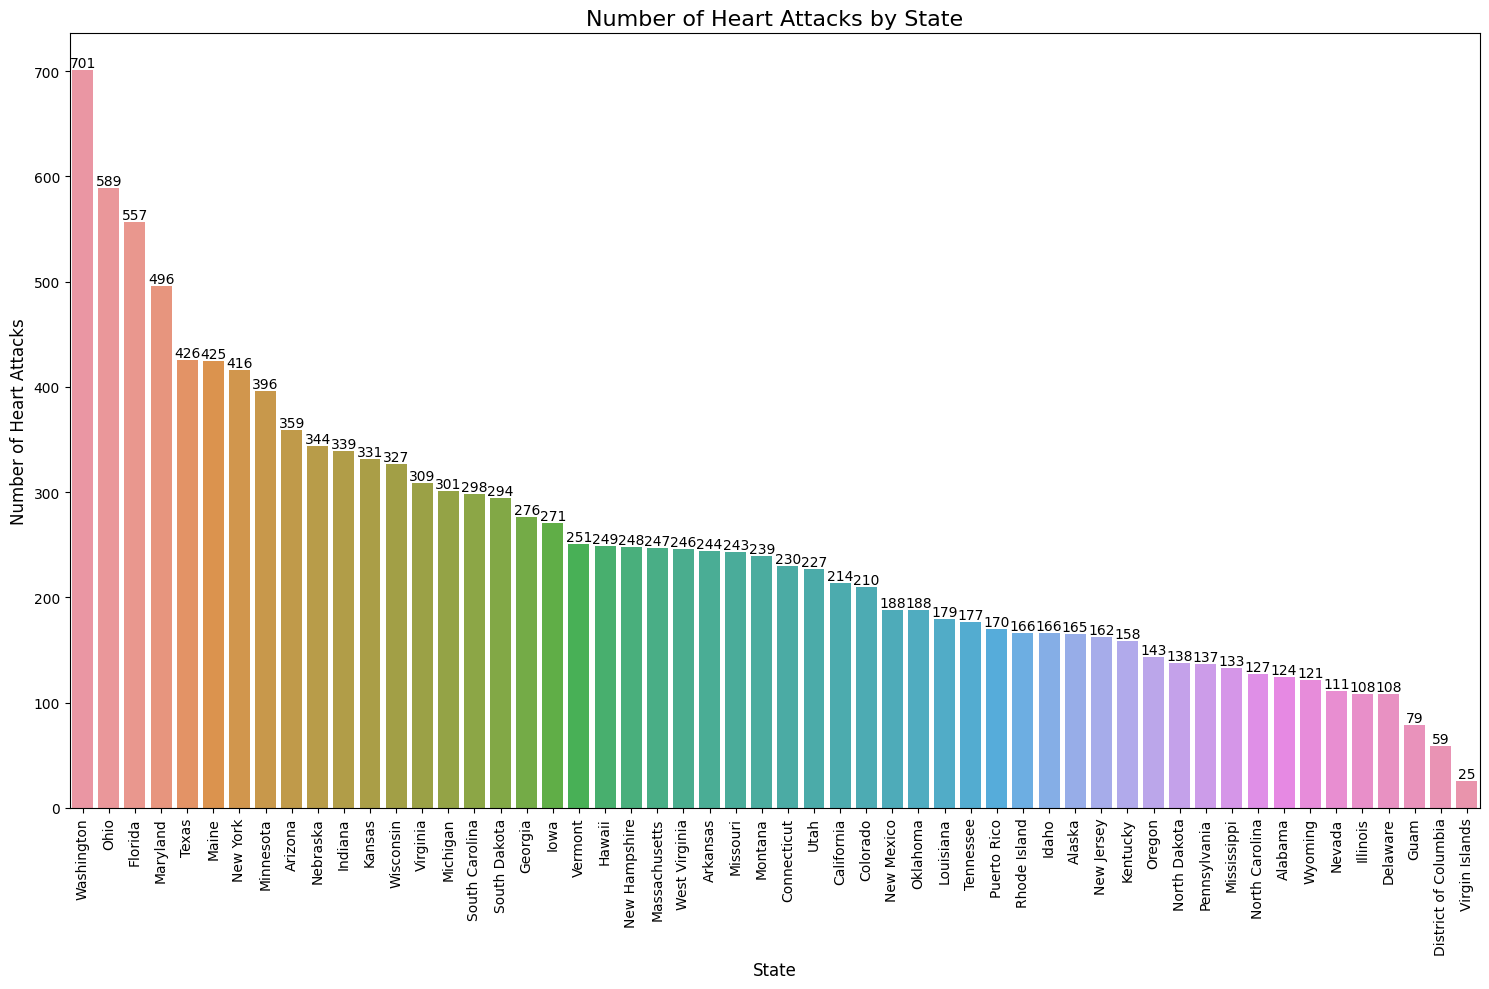

In [46]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by state
heart_attacks_by_state = heart_attacks['State'].value_counts()

# Sort the data in descending order
heart_attacks_by_state = heart_attacks_by_state.sort_values(ascending=False)

# Create the bar graph
plt.figure(figsize=(15, 10))
sns.barplot(x=heart_attacks_by_state.index, y=heart_attacks_by_state.values)

# Customize the graph
plt.title('Number of Heart Attacks by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Add value labels on top of each bar
for i, v in enumerate(heart_attacks_by_state.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



/var/folders/fd/n_lksln53nj3d_0j7209_rrw0000gn/T/ipykernel_4521/1011569810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_attacks['WeightCategory'] = pd.cut(heart_attacks['WeightInKilograms'],
/Users/moiz/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


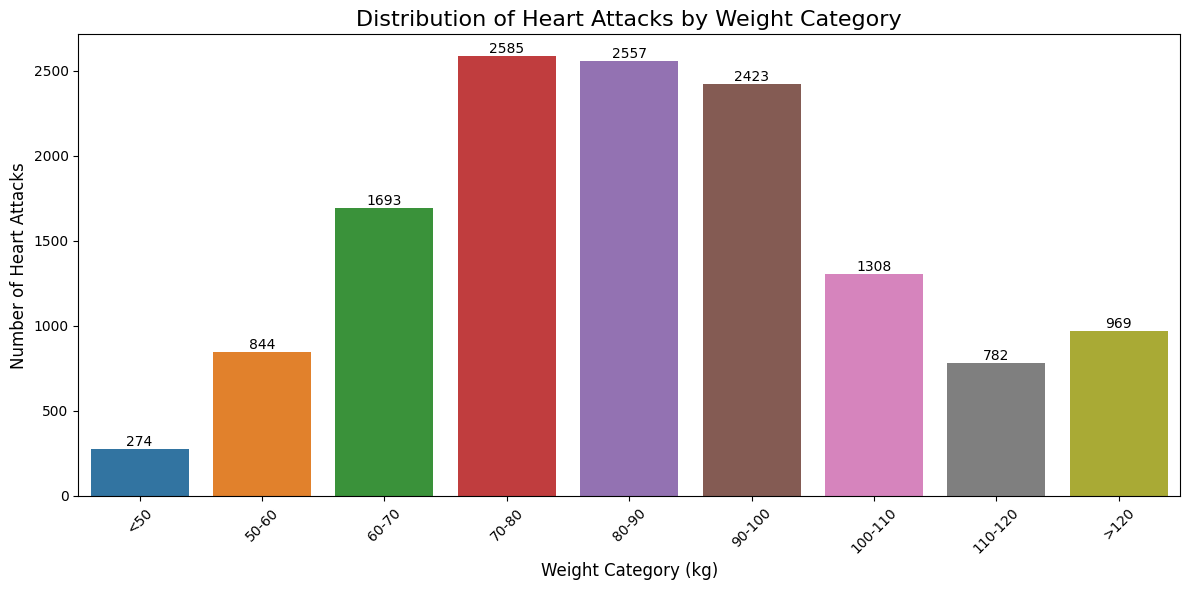

WeightCategory
<50         274
50-60       844
60-70      1693
70-80      2585
80-90      2557
90-100     2423
100-110    1308
110-120     782
>120        969
Name: count, dtype: int64


In [55]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Create weight categories
heart_attacks['WeightCategory'] = pd.cut(heart_attacks['WeightInKilograms'], 
                                         bins=[0, 50, 60, 70, 80, 90, 100, 110, 120, float('inf')],
                                         labels=['<50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110', '110-120', '>120'])

# Count heart attacks by weight category
heart_attacks_by_weight = heart_attacks['WeightCategory'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=heart_attacks_by_weight.index, y=heart_attacks_by_weight.values)

# Customize the chart
plt.title('Distribution of Heart Attacks by Weight Category', fontsize=16)
plt.xlabel('Weight Category (kg)', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(heart_attacks_by_weight.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_weight)

/var/folders/fd/n_lksln53nj3d_0j7209_rrw0000gn/T/ipykernel_4521/1296837743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_attacks['BMICategory'] = pd.cut(heart_attacks['BMI'], bins=bmi_bins, labels=bmi_labels)
/Users/moiz/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


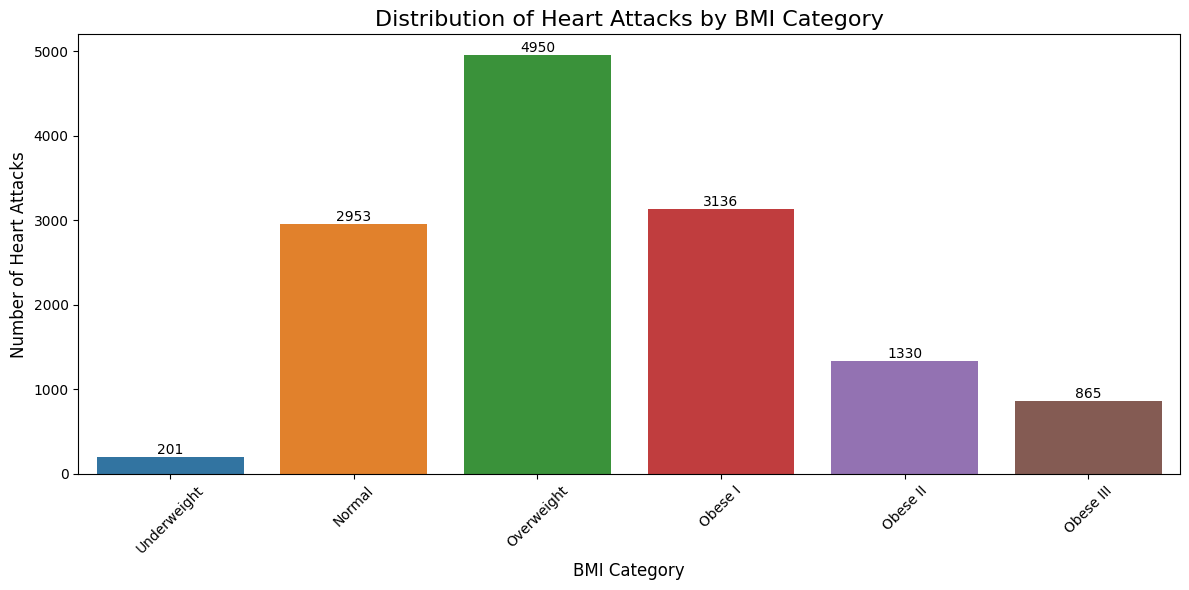

BMICategory
Underweight     201
Normal         2953
Overweight     4950
Obese I        3136
Obese II       1330
Obese III       865
Name: count, dtype: int64


In [56]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Create BMI categories
bmi_bins = [0, 18.5, 25, 30, 35, 40, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']
heart_attacks['BMICategory'] = pd.cut(heart_attacks['BMI'], bins=bmi_bins, labels=bmi_labels)

# Count heart attacks by BMI category
heart_attacks_by_bmi = heart_attacks['BMICategory'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=heart_attacks_by_bmi.index, y=heart_attacks_by_bmi.values)

# Customize the chart
plt.title('Distribution of Heart Attacks by BMI Category', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Number of Heart Attacks', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(heart_attacks_by_bmi.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_bmi)

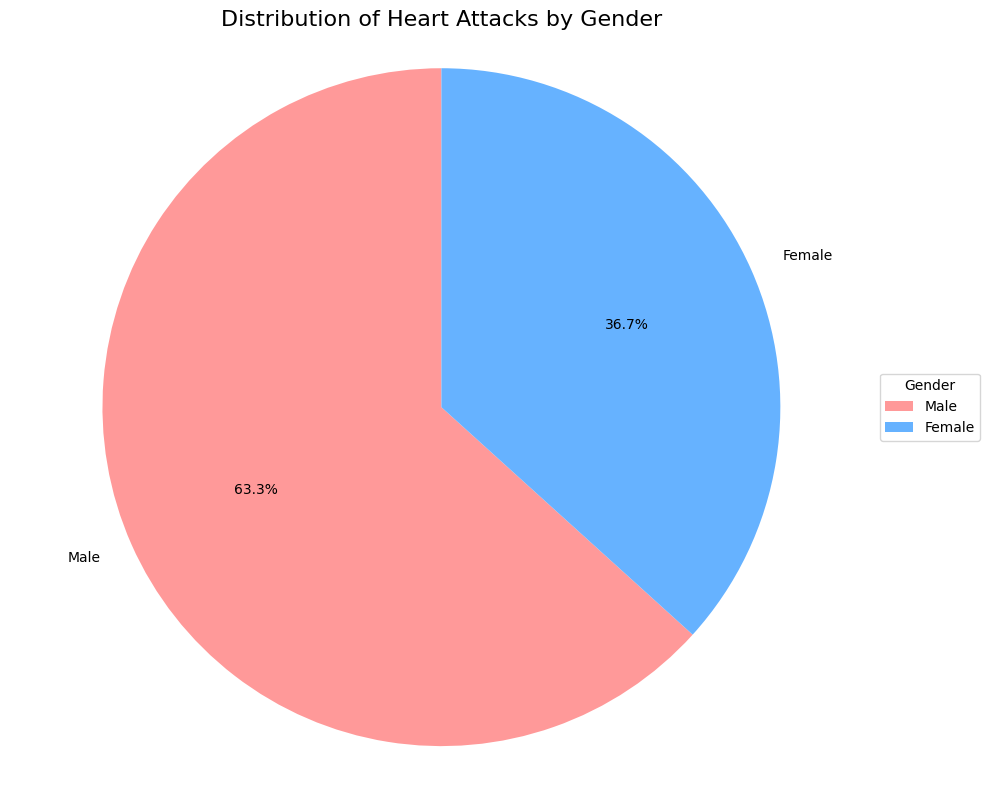

Sex
Male      8503
Female    4932
Name: count, dtype: int64


In [60]:
# Filter for people who had heart attacks
heart_attacks = df[df['HadHeartAttack'] == 'Yes']

# Count heart attacks by gender
heart_attacks_by_gender = heart_attacks['Sex'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(heart_attacks_by_gender.values, labels=heart_attacks_by_gender.index, 
        autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])

# Add a title
plt.title('Distribution of Heart Attacks by Gender', fontsize=16)

# Add a legend
plt.legend(title="Gender", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

# Print the data
print(heart_attacks_by_gender)

In [67]:
import plotly.express as px


# Count heart attacks by state
heart_attacks_by_state = df[df['HadHeartAttack'] == 'Yes']['State'].value_counts().reset_index()
heart_attacks_by_state.columns = ['State', 'HeartAttacks']

# Calculate heart attack rate per 100,000 people
state_populations = df['State'].value_counts().reset_index()
state_populations.columns = ['State', 'Population']
heart_attacks_by_state = heart_attacks_by_state.merge(state_populations, on='State')
heart_attacks_by_state['HeartAttackRate'] = (heart_attacks_by_state['HeartAttacks'] / heart_attacks_by_state['Population']) * 100000


# Create a dictionary to map state names to their two-letter codes
state_code_map = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Convert state names to codes if necessary
if heart_attacks_by_state['State'].iloc[0] not in state_code_map.values():
    heart_attacks_by_state['State'] = heart_attacks_by_state['State'].map(state_code_map)

# Create the choropleth map
fig = px.choropleth(heart_attacks_by_state,
                    locations='State', 
                    locationmode="USA-states", 
                    color='HeartAttackRate',
                    scope="usa",
                    color_continuous_scale="Reds",
                    labels={'HeartAttackRate':'Heart Attack Rate per 100,000'},
                    title='Heart Attack Rates by State')

# Update the layout
fig.update_layout(
    title_x=0.5,
    geo_scope='usa',
)

# Show the map
fig.show()


